## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  81.445945   510.357631  0.780129   4.080289  1.364779
1  84.988572  1054.231819  0.074054   1.854836  0.796221
2  35.717286   556.630935  0.905404   5.486684  1.437871
3  60.900873  1732.089071  0.240694   9.514098  1.650155
4  86.981010   244.036876  0.404428  10.353106  0.927749


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.10441 | train_mse: 7.30405 | train_mae: 2.04635 |  0:00:00s
epoch 1  | loss: 0.56886 | train_mse: 10.67728| train_mae: 2.34689 |  0:00:00s
epoch 2  | loss: 0.51366 | train_mse: 12.67881| train_mae: 2.49976 |  0:00:00s


epoch 3  | loss: 0.33676 | train_mse: 10.70003| train_mae: 2.33829 |  0:00:00s
epoch 4  | loss: 0.37518 | train_mse: 4.77884 | train_mae: 1.60531 |  0:00:00s
epoch 5  | loss: 0.56609 | train_mse: 3.5497  | train_mae: 1.3459  |  0:00:00s


epoch 6  | loss: 0.56428 | train_mse: 1.72412 | train_mae: 0.9467  |  0:00:00s
epoch 7  | loss: 0.36599 | train_mse: 1.58824 | train_mae: 0.88666 |  0:00:00s
epoch 8  | loss: 0.41989 | train_mse: 1.96651 | train_mae: 1.03801 |  0:00:00s


epoch 9  | loss: 0.51844 | train_mse: 1.37095 | train_mae: 0.82954 |  0:00:00s
epoch 10 | loss: 0.35517 | train_mse: 0.926   | train_mae: 0.65847 |  0:00:00s
epoch 11 | loss: 0.21547 | train_mse: 0.75135 | train_mae: 0.59837 |  0:00:00s


epoch 12 | loss: 0.5287  | train_mse: 0.74534 | train_mae: 0.60355 |  0:00:01s
epoch 13 | loss: 0.43339 | train_mse: 0.61463 | train_mae: 0.57502 |  0:00:01s
epoch 14 | loss: 0.3596  | train_mse: 0.57212 | train_mae: 0.52035 |  0:00:01s


epoch 15 | loss: 0.29421 | train_mse: 0.54445 | train_mae: 0.48296 |  0:00:01s
epoch 16 | loss: 0.28578 | train_mse: 0.58268 | train_mae: 0.50401 |  0:00:01s
epoch 17 | loss: 0.44787 | train_mse: 0.5949  | train_mae: 0.53007 |  0:00:01s
epoch 18 | loss: 0.43266 | train_mse: 0.64623 | train_mae: 0.5403  |  0:00:01s


epoch 19 | loss: 0.25084 | train_mse: 0.6233  | train_mae: 0.55778 |  0:00:01s
epoch 20 | loss: 0.26174 | train_mse: 0.60536 | train_mae: 0.55456 |  0:00:01s
epoch 21 | loss: 0.24    | train_mse: 0.62631 | train_mae: 0.53235 |  0:00:01s
epoch 22 | loss: 0.4764  | train_mse: 0.60719 | train_mae: 0.52687 |  0:00:01s


epoch 23 | loss: 0.35812 | train_mse: 0.58671 | train_mae: 0.50163 |  0:00:01s
epoch 24 | loss: 0.34327 | train_mse: 0.5946  | train_mae: 0.49234 |  0:00:01s
epoch 25 | loss: 0.30967 | train_mse: 0.43836 | train_mae: 0.47811 |  0:00:01s
epoch 26 | loss: 0.20966 | train_mse: 0.60704 | train_mae: 0.56157 |  0:00:01s


epoch 27 | loss: 0.29793 | train_mse: 0.57606 | train_mae: 0.53871 |  0:00:02s
epoch 28 | loss: 0.25439 | train_mse: 0.29148 | train_mae: 0.41545 |  0:00:02s
epoch 29 | loss: 0.16818 | train_mse: 0.36708 | train_mae: 0.42371 |  0:00:02s


epoch 30 | loss: 0.30724 | train_mse: 0.31981 | train_mae: 0.41498 |  0:00:02s
epoch 31 | loss: 0.28349 | train_mse: 0.30635 | train_mae: 0.40556 |  0:00:02s
epoch 32 | loss: 0.45214 | train_mse: 0.42528 | train_mae: 0.4417  |  0:00:02s
epoch 33 | loss: 0.44119 | train_mse: 0.47819 | train_mae: 0.45137 |  0:00:02s


epoch 34 | loss: 0.31613 | train_mse: 0.32874 | train_mae: 0.38894 |  0:00:02s
epoch 35 | loss: 0.30348 | train_mse: 0.3172  | train_mae: 0.39901 |  0:00:02s
epoch 36 | loss: 0.35588 | train_mse: 0.29151 | train_mae: 0.37452 |  0:00:02s
epoch 37 | loss: 0.25975 | train_mse: 0.20253 | train_mae: 0.3243  |  0:00:02s


epoch 38 | loss: 0.15275 | train_mse: 0.20694 | train_mae: 0.3411  |  0:00:02s
epoch 39 | loss: 0.30391 | train_mse: 0.15851 | train_mae: 0.28309 |  0:00:02s
epoch 40 | loss: 0.20153 | train_mse: 0.12009 | train_mae: 0.23875 |  0:00:02s


epoch 41 | loss: 0.20441 | train_mse: 0.13496 | train_mae: 0.25643 |  0:00:03s
epoch 42 | loss: 0.37357 | train_mse: 0.10246 | train_mae: 0.23785 |  0:00:03s
epoch 43 | loss: 0.29472 | train_mse: 0.10202 | train_mae: 0.2392  |  0:00:03s
epoch 44 | loss: 0.38305 | train_mse: 0.10904 | train_mae: 0.24211 |  0:00:03s


epoch 45 | loss: 0.28619 | train_mse: 0.09963 | train_mae: 0.23573 |  0:00:03s
epoch 46 | loss: 0.20883 | train_mse: 0.09325 | train_mae: 0.23567 |  0:00:03s


epoch 47 | loss: 0.12759 | train_mse: 0.10706 | train_mae: 0.25568 |  0:00:03s
epoch 48 | loss: 0.31838 | train_mse: 0.23105 | train_mae: 0.33603 |  0:00:03s
epoch 49 | loss: 0.16939 | train_mse: 0.19051 | train_mae: 0.32574 |  0:00:03s


epoch 50 | loss: 0.22916 | train_mse: 0.17099 | train_mae: 0.29189 |  0:00:03s
epoch 51 | loss: 0.20452 | train_mse: 0.09952 | train_mae: 0.24671 |  0:00:03s
epoch 52 | loss: 0.26897 | train_mse: 0.2197  | train_mae: 0.30999 |  0:00:03s


epoch 53 | loss: 0.33986 | train_mse: 0.24353 | train_mae: 0.31286 |  0:00:03s
epoch 54 | loss: 0.32686 | train_mse: 0.34929 | train_mae: 0.35162 |  0:00:04s
epoch 55 | loss: 0.38996 | train_mse: 0.31359 | train_mae: 0.35276 |  0:00:04s


epoch 56 | loss: 0.46741 | train_mse: 0.3536  | train_mae: 0.34015 |  0:00:04s
epoch 57 | loss: 0.27649 | train_mse: 0.25542 | train_mae: 0.30032 |  0:00:04s
epoch 58 | loss: 0.3371  | train_mse: 0.22359 | train_mae: 0.2794  |  0:00:04s


epoch 59 | loss: 0.2917  | train_mse: 0.2842  | train_mae: 0.33264 |  0:00:04s
epoch 60 | loss: 0.38458 | train_mse: 0.37491 | train_mae: 0.38367 |  0:00:04s


epoch 61 | loss: 0.36916 | train_mse: 0.27228 | train_mae: 0.34873 |  0:00:04s
epoch 62 | loss: 0.39486 | train_mse: 0.24415 | train_mae: 0.32364 |  0:00:04s
epoch 63 | loss: 0.42598 | train_mse: 0.23627 | train_mae: 0.31381 |  0:00:04s
epoch 64 | loss: 0.2751  | train_mse: 0.24195 | train_mae: 0.3242  |  0:00:04s


epoch 65 | loss: 0.43031 | train_mse: 0.25234 | train_mae: 0.3278  |  0:00:04s
epoch 66 | loss: 0.29159 | train_mse: 0.21415 | train_mae: 0.30314 |  0:00:05s
epoch 67 | loss: 0.26256 | train_mse: 0.21067 | train_mae: 0.31225 |  0:00:05s


epoch 68 | loss: 0.26674 | train_mse: 0.20564 | train_mae: 0.30499 |  0:00:05s
epoch 69 | loss: 0.22437 | train_mse: 0.18235 | train_mae: 0.28477 |  0:00:05s
epoch 70 | loss: 0.22735 | train_mse: 0.20642 | train_mae: 0.28747 |  0:00:05s
epoch 71 | loss: 0.35991 | train_mse: 0.18456 | train_mae: 0.27088 |  0:00:05s


epoch 72 | loss: 0.32114 | train_mse: 0.22751 | train_mae: 0.28549 |  0:00:05s
epoch 73 | loss: 0.34706 | train_mse: 0.29934 | train_mae: 0.32225 |  0:00:05s
epoch 74 | loss: 0.26941 | train_mse: 0.28652 | train_mae: 0.33521 |  0:00:05s
epoch 75 | loss: 0.19816 | train_mse: 0.23423 | train_mae: 0.31943 |  0:00:05s


epoch 76 | loss: 0.32834 | train_mse: 0.20117 | train_mae: 0.3001  |  0:00:05s
epoch 77 | loss: 0.24779 | train_mse: 0.18278 | train_mae: 0.2708  |  0:00:05s
epoch 78 | loss: 0.38507 | train_mse: 0.18174 | train_mae: 0.27233 |  0:00:05s
epoch 79 | loss: 0.35702 | train_mse: 0.23574 | train_mae: 0.3118  |  0:00:05s


epoch 80 | loss: 0.23906 | train_mse: 0.25941 | train_mae: 0.33729 |  0:00:05s
epoch 81 | loss: 0.20921 | train_mse: 0.28239 | train_mae: 0.34781 |  0:00:06s
epoch 82 | loss: 0.20837 | train_mse: 0.2985  | train_mae: 0.35168 |  0:00:06s


epoch 83 | loss: 0.17731 | train_mse: 0.33132 | train_mae: 0.36503 |  0:00:06s
epoch 84 | loss: 0.16081 | train_mse: 0.38634 | train_mae: 0.40105 |  0:00:06s
epoch 85 | loss: 0.22598 | train_mse: 0.40689 | train_mae: 0.4357  |  0:00:06s
epoch 86 | loss: 0.1828  | train_mse: 0.35277 | train_mae: 0.40688 |  0:00:06s


epoch 87 | loss: 0.25537 | train_mse: 0.3274  | train_mae: 0.37953 |  0:00:06s
epoch 88 | loss: 0.21321 | train_mse: 0.27107 | train_mae: 0.34118 |  0:00:06s
epoch 89 | loss: 0.26878 | train_mse: 0.22818 | train_mae: 0.315   |  0:00:06s


epoch 90 | loss: 0.25164 | train_mse: 0.18686 | train_mae: 0.29159 |  0:00:06s
epoch 91 | loss: 0.34624 | train_mse: 0.17634 | train_mae: 0.29479 |  0:00:06s
epoch 92 | loss: 0.38376 | train_mse: 0.1326  | train_mae: 0.27332 |  0:00:06s
epoch 93 | loss: 0.20365 | train_mse: 0.13581 | train_mae: 0.25688 |  0:00:06s


epoch 94 | loss: 0.27247 | train_mse: 0.14697 | train_mae: 0.2716  |  0:00:06s
epoch 95 | loss: 0.25986 | train_mse: 0.19793 | train_mae: 0.31816 |  0:00:06s
epoch 96 | loss: 0.26522 | train_mse: 0.28086 | train_mae: 0.36816 |  0:00:07s

Early stopping occurred at epoch 96 with best_epoch = 46 and best_train_mae = 0.23567
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

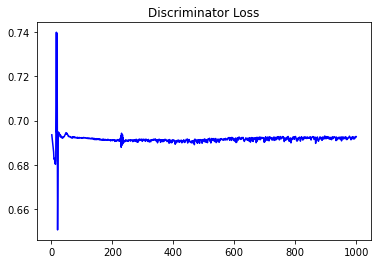

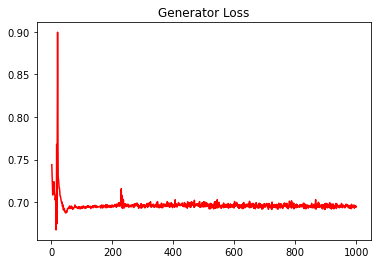

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.3847379743520028


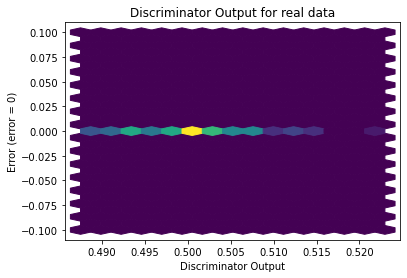

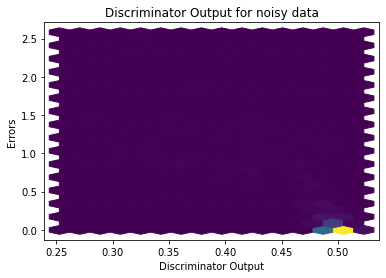

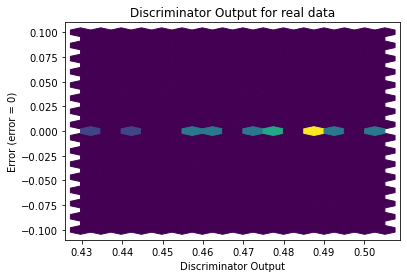

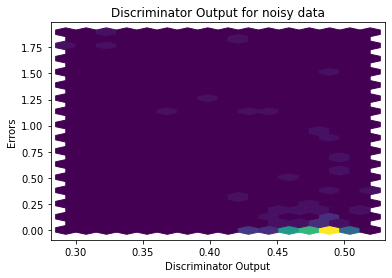

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


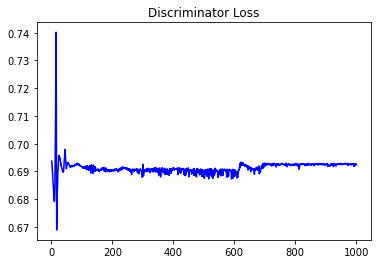

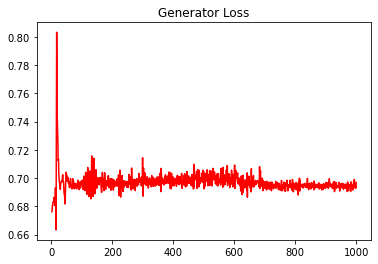

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.31545260542213566


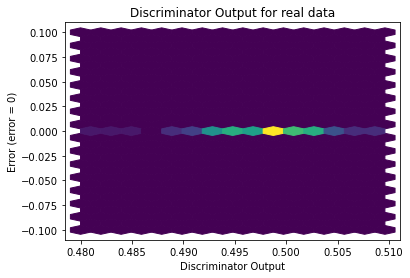

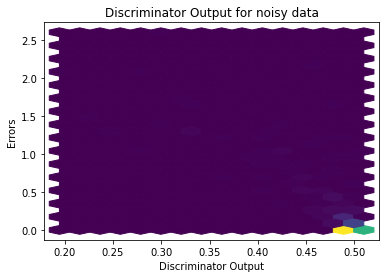

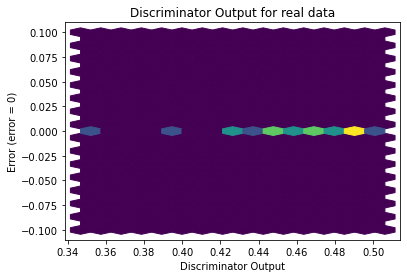

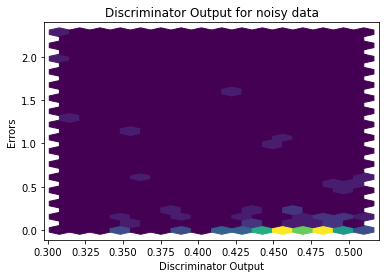

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.8224]], requires_grad=True)
